# Temperature insensitivity test

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import re
from pandas import ExcelWriter
from datetime import datetime
import os
from functools import reduce 
import numpy as np
import xlrd
from os import devnull


os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\121323-d1114-1-w-tempstab")

C:\Users\desi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\desi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
col_L = '#1E5986'
col_R = '#BF8F00'
col_diff = "#FF8080"

In [3]:
df_t = {}
temp = ['25','27','29','30','31','33','35','37','40']
for t in temp: df_t[t] = [pd.read_excel(xlrd.open_workbook(str(os.getcwd())+'\\'+excelfile, logfile=open(devnull, 'w')),engine='xlrd') for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('.xls') and t in excelfile]

Text(0.5, 1.0, 'Temperature insensitivity test - Average of last 5 voltage values')

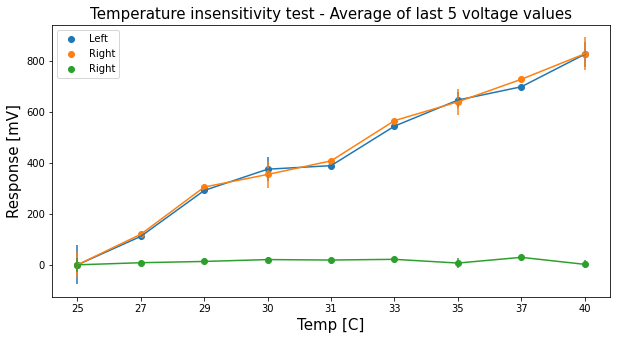

In [4]:
max_std_t = []
for i in temp:
    max_std_t.append([np.mean(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0),np.std(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0)])
    
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(temp,[abs(i[0][0]-max_std_t[0][0][0])*1000 for i in max_std_t], label = 'Left')
plt.errorbar(temp,[abs(i[0][0]-max_std_t[0][0][0])*1000 for i in max_std_t], yerr = [i[1][0]*1000 for i in max_std_t] )
plt.scatter(temp,[abs(i[0][1]-max_std_t[0][0][1])*1000 for i in max_std_t], label = 'Right')
plt.errorbar(temp,[abs(i[0][1]-max_std_t[0][0][1])*1000 for i in max_std_t], yerr = [i[1][1]*1000 for i in max_std_t])
plt.scatter(temp,abs(np.array([i[0][1]-max_std_t[0][0][1] for i in max_std_t]) - np.array([i[0][0]-max_std_t[0][0][0] for i in max_std_t]))*1000, label = 'Right')
plt.errorbar(temp,abs(np.array([i[0][1]-max_std_t[0][0][1] for i in max_std_t]) - np.array([i[0][0]-max_std_t[0][0][0] for i in max_std_t]))*1000, yerr = [np.std(np.diff(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[t]],1)))*1000 for t in temp])
plt.legend()
plt.xlabel('Temp [C]',fontsize = 15)
plt.ylabel('Response [mV]',fontsize = 15)
plt.title('Temperature insensitivity test - Average of last 5 voltage values',fontsize = 15)
#plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\images-results\TempInsensitivyTest-121323.jpeg')

Text(0.5, 1.0, 'Temperature insensitivity test - Average of last 5 voltage values - Diff values')

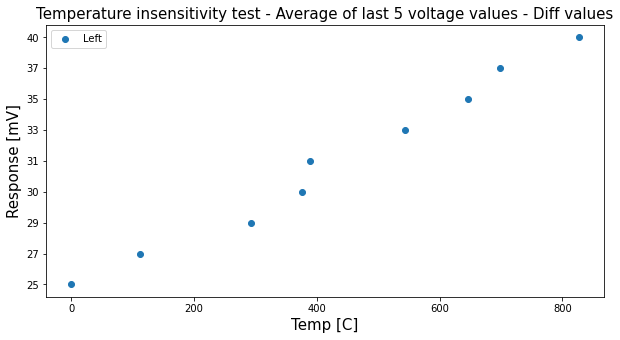

In [5]:
max_std_t = []
for i in temp:
    max_std_t.append([np.mean(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0),np.std(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[i]],1),0)])
    
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter([abs(i[0][0]-max_std_t[0][0][0])*1000 for i in max_std_t],temp, label = 'Left')
#plt.errorbar(temp,abs(np.array([i[0][1]-max_std_t[0][0][1] for i in max_std_t]) - np.array([i[0][0]-max_std_t[0][0][0] for i in max_std_t]))*1000, yerr = [np.std(np.diff(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[t]],1)))*1000 for t in temp])
plt.legend()
plt.xlabel('Temp [C]',fontsize = 15)
plt.ylabel('Response [mV]',fontsize = 15)
plt.title('Temperature insensitivity test - Average of last 5 voltage values - Diff values',fontsize = 15)
#plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\images-results\TempInsensitivyTest_DiffValues-121323.jpeg')

In [6]:
#Saving data in xlsx format
max_ = [maxim[0] for maxim in max_std_t]
std = [maxim[1] for maxim in max_std_t]
data = [[i[0] for i in max_], [i[0] for i in std], [i[1] for i in max_], [i[1] for i in std], index]
table = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [V]', 1: 'std_L [V]', 2: 'Mean_R [V]', 3: 'std_R [V]', 4: 'temperature'}).set_index('temperature')

table['|VL-VR|[V]'] = abs(table['Mean_L [V]']- table['Mean_R [V]'])
table['std |VL-VR|[V]'] = [np.std(np.diff(np.mean([k[['DrainVLeft','DrainVRight']].iloc[-5:] for k in df_t[t]],1))) for t in temp]
table['Diff [V]'] = abs(table['Mean_L [V]']-table['Mean_R [V]'])
table.to_excel(r'C:\Users\Desi\Desktop\TesiStanford\images-results\table_TempInsensitivityTest-121323-1.xlsx')

NameError: name 'index' is not defined

In [ ]:
table

In [7]:
# sorting the files in the folder based on the acquisition time

search_dir = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\121323-d1114-1-w-tempstab"

files = filter(os.path.isfile, os.listdir(search_dir))
files = [os.path.join(search_dir, f) for f in files] # add path to each file
files.sort(key=lambda x: os.path.getmtime(x))

In [8]:
df_t_order = []
df_t_order = [pd.read_excel(xlrd.open_workbook(excelfile, logfile=open(devnull, 'w')),engine='xlrd') for excelfile in files if excelfile.endswith('.xls')]

C:\Users\Desi\AppData\Local\Temp\ipykernel_15608\3898636800.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(range(len(order)), [(i[0] - max_t_ord[0][0]) * 1000 for i in max_t_ord], label = 'Left OFET', color = col_L,linewidth = 3, marker = 's', markersize = 10)
C:\Users\Desi\AppData\Local\Temp\ipykernel_15608\3898636800.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(range(len(order)),[(i[1]-max_t_ord[0][1])*1000 for i in max_t_ord], label = 'Right OFET', color = col_R,linewidth = 3, marker = 'o', markersize = 10)
C:\Users\Desi\AppData\Local\Temp\ipykernel_15608\3898636800.py:17: FutureWar

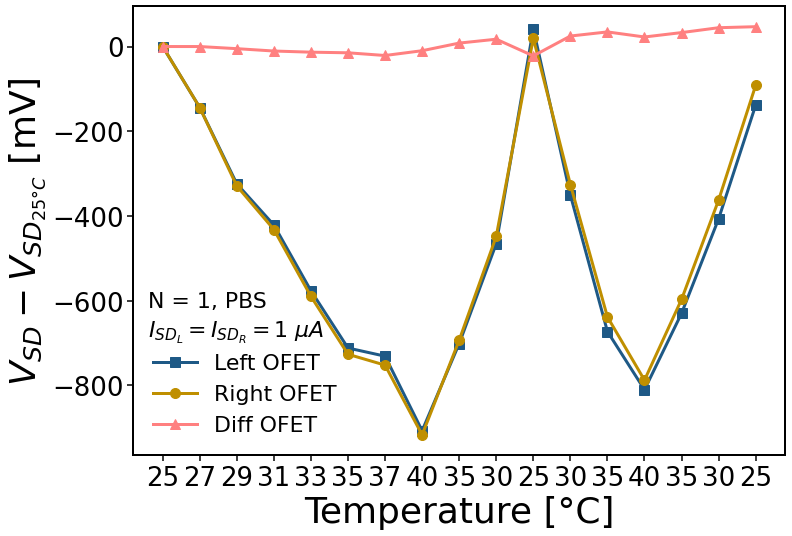

In [25]:
max_t_ord = []
order = ['25','27','29','31','33','35','37','40','35','30','25','30','35','40','35','30','25']

max_t_ord = [np.mean(k[['DrainVLeft','DrainVRight']].iloc[-5:],0) for k in df_t_order]

fig, ax1 = plt.subplots(figsize=(11.69, 8.26))

# width of the margins
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
plt.xticks(range(len(order)), order)

plt.plot(range(len(order)), [(i[0] - max_t_ord[0][0]) * 1000 for i in max_t_ord], label = 'Left OFET', color = col_L,linewidth = 3, marker = 's', markersize = 10)
plt.plot(range(len(order)),[(i[1]-max_t_ord[0][1])*1000 for i in max_t_ord], label = 'Right OFET', color = col_R,linewidth = 3, marker = 'o', markersize = 10)
plt.plot(range(len(order)),(np.array([i[1]-max_t_ord[0][1] for i in max_t_ord]) - np.array([i[0]-max_t_ord[0][0] for i in max_t_ord]))*1000, label = 'Diff OFET', color = col_diff,linewidth = 3, marker = '^', markersize = 10)

ax1.tick_params(axis='both', width=1.5,length=6,labelsize=26)
plt.legend(fontsize = 22, frameon=False)
plt.text(-0.4, -615, 'N = 1, PBS', fontsize = 22)
plt.text(-0.4, -685, '$I_{SD_L} = I_{SD_R} = 1\ \mu A$', fontsize = 22)
plt.xlabel('Temperature [°C]',fontsize = 36)
plt.ylabel('$V_{SD}-V_{SD_{25°C}}$ [mV]',fontsize = 36)
plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\timestab.jpeg',bbox_inches='tight', dpi = 1200)

In [ ]:
# saving data in clsx format

data = [[abs(i[0] - max_t_ord[0][0]) for i in max_t_ord],[abs(i[1] - max_t_ord[0][1]) for i in max_t_ord],abs(np.array([i[1]-max_t_ord[0][1] for i in max_t_ord]) - np.array([i[0]-max_t_ord[0][0] for i in max_t_ord])),order]
table = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [V]', 1: 'Mean_R [V]', 2: 'Diff |VR-VL| [V]', 3: 'temperature [C]'}).set_index('temperature [C]')
table.to_excel(r'C:\Users\Desi\Desktop\TesiStanford\images-results\table_TempInsensitivityTest-121323-2.xlsx')

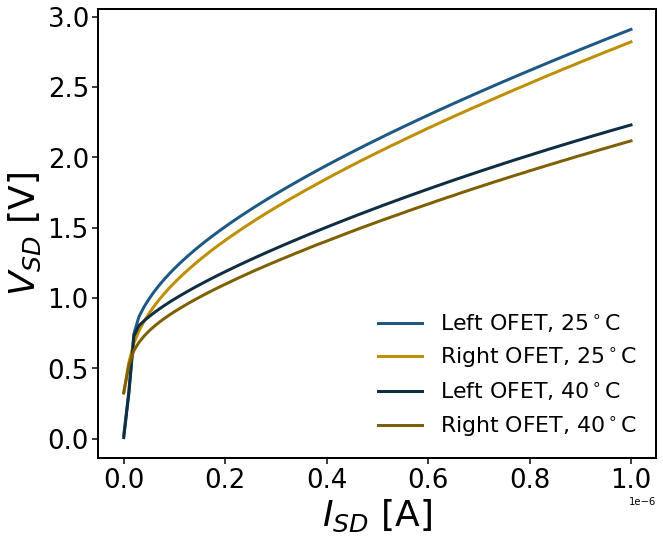

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 8.26))
colL_2 = '#0F2D43'
colR_2 =  '#7F6000'
# width of the margins
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)

plt.plot(df_t['25'][0]['DrainI'],df_t['25'][0]['DrainVLeft'], label = 'Left OFET, 25$^\circ$C', color = col_L,linewidth = 3)
plt.plot(df_t['25'][0]['DrainI'],df_t['25'][0]['DrainVRight'], label = 'Right OFET, 25$^\circ$C', color = col_R,linewidth = 3)
plt.plot(df_t['40'][0]['DrainI'],df_t['40'][0]['DrainVLeft'], label = 'Left OFET, 40$^\circ$C', color = colL_2,linewidth = 3)
plt.plot(df_t['40'][0]['DrainI'],df_t['40'][0]['DrainVRight'], label = 'Right OFET, 40$^\circ$C', color = colR_2,linewidth = 3)

ax1.tick_params(axis='both', width=1.5,length=6,labelsize=26)
plt.legend(fontsize = 22, frameon=False)
#plt.text(-0.4, -615, 'N = 1, PBS', fontsize = 22)
plt.xlabel('$I_{SD}$ [A]',fontsize = 36)
plt.ylabel('$V_{SD}$ [V]',fontsize = 36)
plt.savefig(r'C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\CompTemp.jpeg',bbox_inches='tight', dpi = 1200)

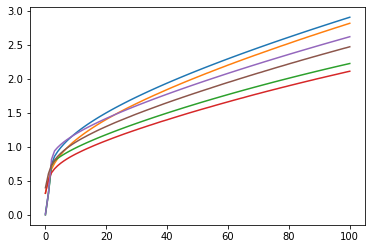

In [15]:
plt.plot(df_t['25'][0]['DrainVLeft'])
plt.plot(df_t['25'][0]['DrainVRight'])
plt.plot(df_t['40'][0]['DrainVLeft'])
plt.plot(df_t['40'][0]['DrainVRight'])

In [16]:
df_t['25']

[         Time        DrainI  DrainVLeft         GateI  DrainVRight
 0    0.032310  0.000000e+00    0.022710  0.000000e+00     0.324896
 1    0.064918  1.000000e-08    0.331604  1.000000e-08     0.539047
 2    0.098012  2.000000e-08    0.745360  2.000000e-08     0.679547
 3    0.131079  3.000000e-08    0.867471  3.000000e-08     0.765133
 4    0.164127  4.000000e-08    0.936645  4.000000e-08     0.832979
 ..        ...           ...         ...           ...          ...
 96   3.206923  9.600000e-07    2.853747  9.600000e-07     2.764233
 97   3.240010  9.700000e-07    2.867920  9.700000e-07     2.778272
 98   3.273104  9.800000e-07    2.882305  9.800000e-07     2.793093
 99   3.306209  9.900000e-07    2.896316  9.900000e-07     2.807417
 100  3.339282  1.000000e-06    2.910488  1.000000e-06     2.821669
 
 [101 rows x 5 columns],
          Time        DrainI  DrainVLeft         GateI  DrainVRight
 0    0.032335  0.000000e+00    0.020485  0.000000e+00     0.362782
 1    0.064886  1.000